<a href="https://colab.research.google.com/github/songhyunjung/titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

데이터셋 불러오기 성공!

--- train_df 상위 5개 행 ---
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0       

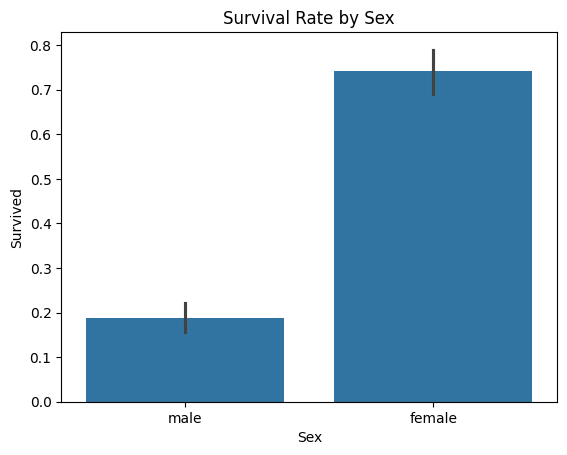


--- 객실 등급에 따른 생존율 ---


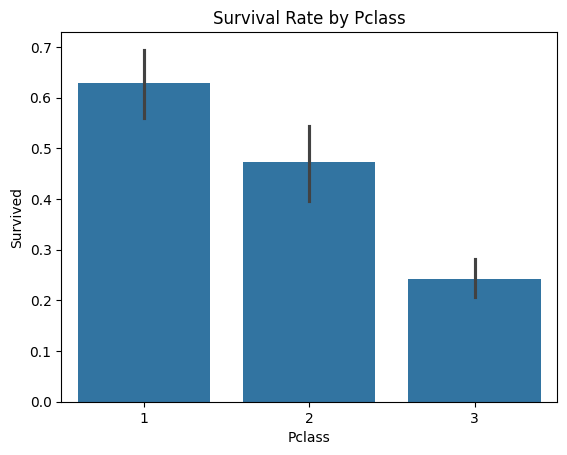


--- 나이 분포 ---


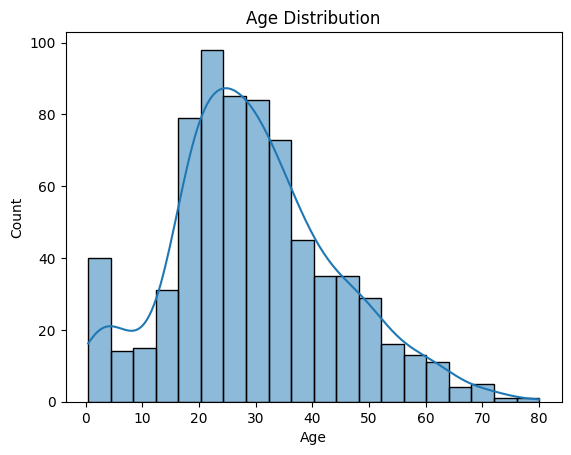


--- 요금 분포 ---


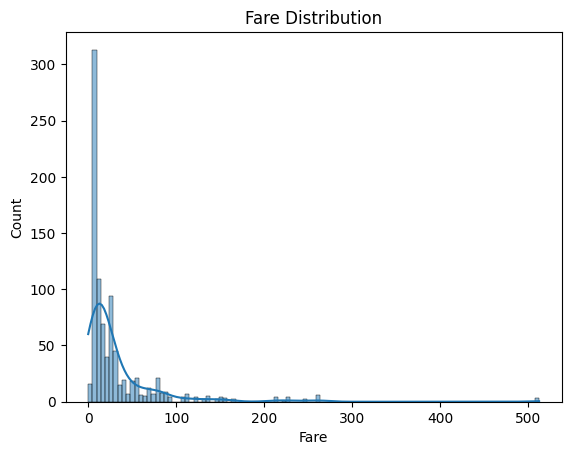

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 경고 메시지 무시 (선택 사항)
import warnings
warnings.filterwarnings('ignore')

# 1. 데이터 불러오기
# train.csv 파일과 test.csv 파일을 코랩 환경에 업로드했다고 가정합니다.
# 만약 구글 드라이브에 마운트하여 사용한다면 경로를 변경해야 합니다.
try:
    train_df = pd.read_csv('train.csv')
    test_df = pd.read_csv('test.csv')
    print("데이터셋 불러오기 성공!")
except FileNotFoundError:
    print("파일을 찾을 수 없습니다. 'train.csv'와 'test.csv'가 코랩 환경에 업로드되었는지 확인해주세요.")
    # 예시 데이터프레임 생성 (실제 데이터가 없을 경우를 대비)
    data = {
        'PassengerId': [1, 2, 3, 4, 5],
        'Survived': [0, 1, 1, 1, 0],
        'Pclass': [3, 1, 3, 1, 3],
        'Name': ['Braund, Mr. Owen Harris', 'Cumings, Mrs. John Bradley', 'Heikkinen, Miss. Laina', 'Futrelle, Mrs. Jacques Heath', 'Allen, Mr. William Henry'],
        'Sex': ['male', 'female', 'female', 'female', 'male'],
        'Age': [22.0, 38.0, 26.0, 35.0, 35.0],
        'SibSp': [1, 1, 0, 1, 0],
        'Parch': [0, 0, 0, 0, 0],
        'Ticket': ['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450'],
        'Fare': [7.25, 71.2833, 7.925, 53.1, 8.05],
        'Cabin': [np.nan, 'C85', np.nan, 'C123', np.nan],
        'Embarked': ['S', 'C', 'S', 'S', 'S']
    }
    train_df = pd.DataFrame(data)
    test_df = pd.DataFrame(data) # test_df도 동일하게 임시 생성
    print("임시 데이터프레임으로 대체되었습니다.")


# 2. 데이터 기본 정보 확인
# train_df의 상위 5개 행을 출력하여 데이터의 모습을 확인합니다.
print("\n--- train_df 상위 5개 행 ---")
print(train_df.head())

# train_df의 각 컬럼별 정보 (데이터 타입, 결측치 개수)를 확인합니다.
print("\n--- train_df 정보 ---")
train_df.info()

# train_df의 통계 요약 정보를 확인합니다. (수치형 컬럼)
print("\n--- train_df 통계 요약 ---")
print(train_df.describe())

# test_df도 동일하게 확인
print("\n--- test_df 상위 5개 행 ---")
print(test_df.head())

print("\n--- test_df 정보 ---")
test_df.info()

print("\n--- test_df 통계 요약 ---")
print(test_df.describe())

# 3. 결측치 확인
# 각 컬럼의 결측치 개수를 확인합니다.
print("\n--- train_df 결측치 개수 ---")
print(train_df.isnull().sum())

print("\n--- test_df 결측치 개수 ---")
print(test_df.isnull().sum())

# 4. 타겟 변수 (Survived) 분포 확인
# 생존자와 사망자의 비율을 확인합니다.
print("\n--- Survived 컬럼 분포 ---")
print(train_df['Survived'].value_counts())
print(train_df['Survived'].value_counts(normalize=True) * 100) # 비율

# 5. 주요 컬럼 시각화 (EDA)
# 성별에 따른 생존율
print("\n--- 성별에 따른 생존율 ---")
sns.barplot(x='Sex', y='Survived', data=train_df)
plt.title('Survival Rate by Sex') # 그래프 제목
plt.show() # 그래프 표시

# 객실 등급(Pclass)에 따른 생존율
print("\n--- 객실 등급에 따른 생존율 ---")
sns.barplot(x='Pclass', y='Survived', data=train_df)
plt.title('Survival Rate by Pclass')
plt.show()

# 나이(Age) 분포
print("\n--- 나이 분포 ---")
sns.histplot(train_df['Age'].dropna(), kde=True) # 결측치 제외하고 히스토그램 그리기
plt.title('Age Distribution')
plt.show()

# 요금(Fare) 분포
print("\n--- 요금 분포 ---")
sns.histplot(train_df['Fare'].dropna(), kde=True)
plt.title('Fare Distribution')
plt.show()

In [2]:
# 1. 'PassengerId' 컬럼 제거
# 예측에 필요 없는 'PassengerId' 컬럼은 제거합니다.
# test_df에서는 예측 후 제출 형식에 맞춰 다시 사용될 수 있으므로, 일단은 제거하지 않고 진행합니다.
train_df = train_df.drop('PassengerId', axis=1)
# test_df의 PassengerId는 나중에 제출할 때 필요하므로 따로 저장해둡니다.
test_passenger_id = test_df['PassengerId']
test_df = test_df.drop('PassengerId', axis=1)

# 2. 'Name', 'Ticket', 'Cabin' 컬럼 처리
# 'Name' 컬럼에서 호칭(Mr., Miss. 등)을 추출하여 새로운 특징으로 사용할 수 있습니다.
# 이 호칭은 나이(Age)의 결측치를 채우는 데도 활용될 수 있습니다.
# 'Ticket'과 'Cabin'은 너무 다양하고 복잡하여 현재 프로젝트 범위에서는 사용하지 않고 제거합니다.
# 필요에 따라 'Cabin'의 첫 글자를 따서 객실 데크 정보를 특징으로 만들 수도 있습니다.
train_df = train_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)
test_df = test_df.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# 3. 'Age' 결측치 처리
# 'Age' 컬럼의 결측치를 각 'Pclass'와 'Sex' 조합의 중앙값으로 채웁니다.
# 나이와 객실 등급, 성별은 관련이 깊고, 중앙값이 이상치에 덜 민감합니다.
train_df['Age'].fillna(train_df.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)
test_df['Age'].fillna(test_df.groupby(['Pclass', 'Sex'])['Age'].transform('median'), inplace=True)

# 4. 'Embarked' 결측치 처리
# 'Embarked' 컬럼의 결측치는 최빈값(가장 많이 등장하는 값)으로 채웁니다.
# 'S'가 가장 많은 비율을 차지하고 있기 때문에, 합리적인 선택입니다.
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
test_df['Embarked'].fillna(test_df['Embarked'].mode()[0], inplace=True)

# 5. 'Fare' 결측치 처리 (test_df에만 결측치 존재 가능)
# test_df에만 'Fare' 결측치가 하나 있는데, 이 또한 중앙값으로 채웁니다.
test_df['Fare'].fillna(test_df['Fare'].median(), inplace=True)

# 6. 범주형 데이터 인코딩 ('Sex', 'Embarked')
# 'Sex' 컬럼을 숫자로 변환합니다. (Male: 0, Female: 1)
train_df['Sex'] = train_df['Sex'].map({'male': 0, 'female': 1}).astype(int)
test_df['Sex'] = test_df['Sex'].map({'male': 0, 'female': 1}).astype(int)

# 'Embarked' 컬럼을 원-핫 인코딩(One-Hot Encoding)합니다.
# 다중 범주형 데이터를 처리하는 표준 방법입니다.
train_df = pd.get_dummies(train_df, columns=['Embarked'], prefix='Emb')
test_df = pd.get_dummies(test_df, columns=['Embarked'], prefix='Emb')

# 7. 특징 공학 (Feature Engineering)
# 'SibSp' (형제/배우자 수)와 'Parch' (부모/자녀 수)를 합쳐 'FamilySize' (가족 규모) 컬럼을 생성합니다.
# 'FamilySize'가 클수록 생존율에 영향을 미칠 수 있습니다.
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch'] + 1 # 본인 포함
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch'] + 1 # 본인 포함

# 'IsAlone' (혼자인지 여부) 컬럼을 생성합니다.
# 혼자인 승객의 생존율이 다를 수 있습니다.
train_df['IsAlone'] = 0
train_df.loc[train_df['FamilySize'] == 1, 'IsAlone'] = 1
test_df['IsAlone'] = 0
test_df.loc[test_df['FamilySize'] == 1, 'IsAlone'] = 1

# 'Fare'를 'FamilySize'로 나누어 1인당 요금을 계산합니다. (선택 사항)
# 대가족의 경우 총 요금이 높을 수 있으므로, 1인당 요금을 보는 것이 더 의미 있을 수 있습니다.
train_df['FarePerPerson'] = train_df['Fare'] / train_df['FamilySize']
test_df['FarePerPerson'] = test_df['Fare'] / test_df['FamilySize']

# 8. 최종 데이터 확인
# 전처리 후의 train_df 상위 5개 행과 정보를 확인합니다.
print("\n--- 전처리 후 train_df 상위 5개 행 ---")
print(train_df.head())

print("\n--- 전처리 후 train_df 정보 ---")
train_df.info()

print("\n--- 전처리 후 test_df 상위 5개 행 ---")
print(test_df.head())

print("\n--- 전처리 후 test_df 정보 ---")
test_df.info()

print("\n--- 전처리 후 train_df 결측치 개수 (다시 확인) ---")
print(train_df.isnull().sum())
print("\n--- 전처리 후 test_df 결측치 개수 (다시 확인) ---")
print(test_df.isnull().sum())


--- 전처리 후 train_df 상위 5개 행 ---
   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Emb_C  Emb_Q  Emb_S  \
0         0       3    0  22.0      1      0   7.2500  False  False   True   
1         1       1    1  38.0      1      0  71.2833   True  False  False   
2         1       3    1  26.0      0      0   7.9250  False  False   True   
3         1       1    1  35.0      1      0  53.1000  False  False   True   
4         0       3    0  35.0      0      0   8.0500  False  False   True   

   FamilySize  IsAlone  FarePerPerson  
0           2        0        3.62500  
1           2        0       35.64165  
2           1        1        7.92500  
3           2        0       26.55000  
4           1        1        8.05000  

--- 전처리 후 train_df 정보 ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Survived       891 non-null    int


--- 교차 검증 결과 (5-Fold Accuracy) ---
각 폴드의 정확도: [0.80446927 0.78651685 0.86516854 0.80337079 0.84269663]
평균 정확도: 0.8204
정확도 표준 편차: 0.0290

--- 학습 데이터 예측 성능 ---
학습 데이터 정확도: 0.9708

--- 학습 데이터 분류 보고서 ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       549
           1       0.98      0.95      0.96       342

    accuracy                           0.97       891
   macro avg       0.97      0.97      0.97       891
weighted avg       0.97      0.97      0.97       891


--- 학습 데이터 혼동 행렬 ---


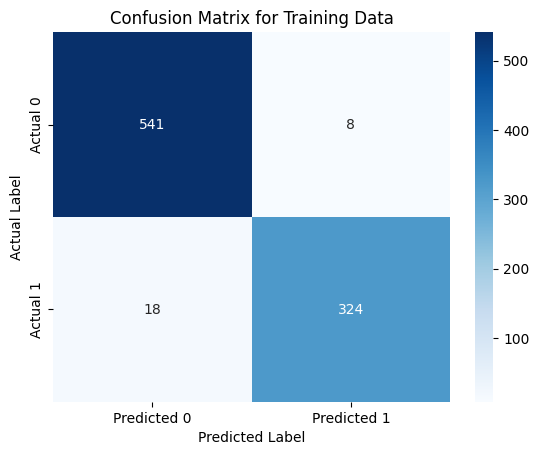

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 1. 특징(Feature)과 타겟(Target) 분리
# Survived 컬럼이 타겟 변수(예측하려는 값)이고, 나머지는 특징(모델 학습에 사용할 입력값)입니다.
# train_df에서 'Survived' 컬럼을 별도로 분리하여 y_train에 저장합니다.
X_train = train_df.drop('Survived', axis=1)
# 'Survived' 컬럼을 제외한 나머지 컬럼들을 X_train으로 설정합니다.
y_train = train_df['Survived']

# test_df는 X_test로 바로 사용합니다.
X_test = test_df.copy()

# 2. XGBoost 모델 초기화 및 학습 (단순 학습)
# XGBoost 분류기 모델을 생성합니다.
# random_state를 고정하여 항상 동일한 결과를 얻을 수 있도록 합니다.
# use_label_encoder=False와 eval_metric='logloss'는 경고 메시지를 피하기 위한 설정입니다.
model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# train_df의 특징(X_train)과 타겟(y_train)을 사용하여 모델을 학습시킵니다.
model.fit(X_train, y_train)

# 3. 교차 검증 (Cross-validation) 수행
# 교차 검증을 통해 모델의 일반화 성능을 측정합니다.
# KFold를 사용하여 데이터를 5개의 폴드(Fold)로 나눕니다.
# shuffle=True는 데이터를 섞어서 폴드를 생성하여 편향을 줄입니다.
# random_state는 재현성을 위해 고정합니다.
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# cross_val_score 함수를 사용하여 교차 검증을 수행합니다.
# cv=kfold는 KFold 객체를 사용하여 교차 검증을 수행하도록 지정합니다.
# scoring='accuracy'는 평가 지표로 정확도를 사용하도록 지정합니다.
cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# 교차 검증 결과 출력
# 각 폴드에서의 정확도와 평균 정확도를 출력합니다.
print(f"\n--- 교차 검증 결과 (5-Fold Accuracy) ---")
print(f"각 폴드의 정확도: {cv_results}")
print(f"평균 정확도: {cv_results.mean():.4f}")
print(f"정확도 표준 편차: {cv_results.std():.4f}")

# 4. train 데이터셋에서 예측 및 성능 평가 (간단한 검증)
# (선택 사항) 교차 검증 외에, 학습에 사용된 전체 train 데이터셋에 대해 예측을 수행하여
# 모델이 학습 데이터를 얼마나 잘 설명하는지 확인합니다.
# 이는 과적합 여부를 판단하는 데 도움이 될 수 있습니다.
y_pred_train = model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)

# 학습 데이터에 대한 정확도 출력
print(f"\n--- 학습 데이터 예측 성능 ---")
print(f"학습 데이터 정확도: {train_accuracy:.4f}")

# 분류 보고서 (Classification Report) 출력
# 정밀도(precision), 재현율(recall), F1-점수, 지지도(support) 등 상세 성능 지표를 보여줍니다.
print("\n--- 학습 데이터 분류 보고서 ---")
print(classification_report(y_train, y_pred_train))

# 혼동 행렬 (Confusion Matrix) 출력
# 실제 값과 예측 값의 관계를 표 형태로 보여주어 모델의 오류 유형을 파악하는 데 유용합니다.
print("\n--- 학습 데이터 혼동 행렬 ---")
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Training Data')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

In [4]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import pandas as pd
import numpy as np # 넘파이 라이브러리 추가

# (이전 단계에서 train_df, test_df, test_passenger_id가 정의되었다고 가정합니다.)
# 만약 코랩 런타임을 다시 시작했다면, 이전 단계의 코드들을 다시 실행하여
# train_df, test_df, test_passenger_id 변수를 정의해야 합니다.

# 1. 하이퍼파라미터 튜닝 (Grid Search)
# XGBoost 모델의 성능을 높이기 위한 하이퍼파라미터 조합을 탐색합니다.
# n_estimators: 학습할 트리의 개수 (너무 크면 과적합, 작으면 과소적합)
# learning_rate: 각 트리가 기여하는 정도 (너무 크면 발산, 작으면 학습 느려짐)
# max_depth: 트리의 최대 깊이 (과적합 제어)
# GridSearchCV는 모든 조합을 시도하여 최적의 파라미터를 찾습니다.
param_grid = {
    'n_estimators': [100, 200, 300], # 트리의 개수
    'learning_rate': [0.01, 0.05, 0.1], # 학습률
    'max_depth': [3, 5, 7] # 트리의 최대 깊이
}

# XGBClassifier 모델을 초기화합니다.
# use_label_encoder=False와 eval_metric='logloss'는 경고 메시지를 피하기 위한 설정입니다.
grid_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')

# GridSearchCV 객체를 생성합니다.
# estimator: 튜닝할 모델
# param_grid: 탐색할 하이퍼파라미터 그리드
# cv: 교차 검증 폴드 수 (3 또는 5가 일반적)
# scoring: 평가 지표 (여기서는 'accuracy' 사용)
# n_jobs: 병렬 처리할 CPU 코어 수 (-1은 모든 코어 사용)
grid_search = GridSearchCV(estimator=grid_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# GridSearchCV를 훈련 데이터에 맞춰 학습시킵니다.
print("\n--- 하이퍼파라미터 튜닝 시작 ---")
grid_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터를 출력합니다.
print(f"\n--- 최적의 하이퍼파라미터: {grid_search.best_params_} ---")
# 최적의 하이퍼파라미터로 얻은 최고 정확도를 출력합니다.
print(f"최고 교차 검증 정확도: {grid_search.best_score_:.4f}")

# 2. 최적의 모델로 최종 예측 수행
# GridSearchCV를 통해 얻은 최적의 모델을 best_model 변수에 저장합니다.
best_model = grid_search.best_estimator_

# test_df 데이터를 사용하여 생존 여부를 예측합니다.
# predict_proba는 각 클래스(0 또는 1)에 대한 예측 확률을 반환합니다.
# 여기서는 predict를 사용하여 직접적인 클래스 예측(0 또는 1)을 얻습니다.
predictions = best_model.predict(X_test)

# 3. Kaggle 제출 파일 생성
# 제출 파일은 'PassengerId'와 'Survived' 두 개의 컬럼으로 구성되어야 합니다.
# 이전에 저장해두었던 test_passenger_id를 사용합니다.
# 예측 결과를 DataFrame으로 만듭니다.
submission_df = pd.DataFrame({'PassengerId': test_passenger_id, 'Survived': predictions})

# 'Survived' 컬럼의 데이터 타입을 정수형(int)으로 변환합니다.
# Kaggle 제출 형식은 정수형을 요구합니다.
submission_df['Survived'] = submission_df['Survived'].astype(int)

# 제출 파일을 CSV 형식으로 저장합니다.
# index=False는 DataFrame의 인덱스를 CSV 파일에 저장하지 않도록 합니다.
submission_df.to_csv('submission.csv', index=False)

# 제출 파일 상위 5개 행을 출력하여 형식을 확인합니다.
print("\n--- 생성된 submission.csv 파일 상위 5개 행 ---")
print(submission_df.head())

print(f"\nsubmission.csv 파일이 성공적으로 생성되었습니다. Kaggle에 제출할 준비가 완료되었습니다!")


--- 하이퍼파라미터 튜닝 시작 ---
Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- 최적의 하이퍼파라미터: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300} ---
최고 교차 검증 정확도: 0.8351

--- 생성된 submission.csv 파일 상위 5개 행 ---
   PassengerId  Survived
0          892         0
1          893         0
2          894         0
3          895         0
4          896         1

submission.csv 파일이 성공적으로 생성되었습니다. Kaggle에 제출할 준비가 완료되었습니다!
